# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import random

In [2]:
# setting random seed
random.seed(0)

# EDA

In [3]:
df = pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [5]:
df.shape

(6598, 170)

In [6]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [7]:
df.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [8]:
df['class'].value_counts() # checking the count of values in Class column

0    5581
1    1017
Name: class, dtype: int64

<AxesSubplot:title={'center':'Bar Graph of 0 and 1 in Class column'}, xlabel='Musk Status', ylabel='No. of Compounds'>

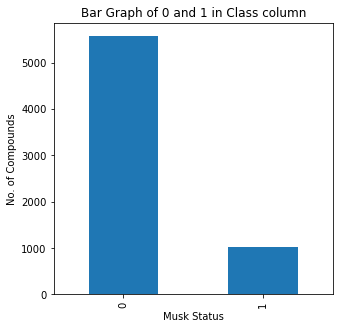

In [9]:
df['class'].value_counts().plot(kind='bar', figsize = (5,5),xlabel = 'Musk Status',ylabel = 'No. of Compounds', title = 'Bar Graph of 0 and 1 in Class column')
# this is not a imbalanced dataset

In [10]:
df['molecule_name'].describe()

count              6598
unique              102
top       NON-MUSK-j146
freq               1044
Name: molecule_name, dtype: object

# Feature Engineering

In [11]:
# Splitting the Features and Target variables
X = df.iloc[:, df.columns != 'class'].values # Selecting All columns except Class column 
y = df.iloc[:, df.columns == 'class'].values

In [12]:
X = X[:, 3:] # f1 to f166
X

array([[46, -108, -60, ..., -50, -112, 96],
       [41, -188, -145, ..., -61, -136, 79],
       [46, -194, -145, ..., -67, -145, 39],
       ...,
       [44, -102, -19, ..., -66, -144, -6],
       [51, -121, -23, ..., -44, -116, 117],
       [51, -122, -23, ..., -44, -115, 118]], dtype=object)

In [13]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [14]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [15]:
# saving y_test value for later use in evaluation
y_test_orig = y_test

In [16]:
# Converting X sets into tensors and y sets into binary class matrix (to use in keras model)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32) 
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32) 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
print('X_train',X_train,'\n\nX_test', X_test,'\n\ny_train', y_train, '\n\ny_test',y_test )

X_train tf.Tensor(
[[  43. -148.   32. ...  -66. -147.   -9.]
 [  35. -196. -138. ...  -53. -154.  121.]
 [  47. -195. -107. ...  -72. -179.    9.]
 ...
 [  36. -124. -142. ...  -51. -158.  128.]
 [  58.   26.   49. ...  -40. -127.  138.]
 [  41. -198. -159. ...  -60. -127.   57.]], shape=(5278, 166), dtype=float32) 

X_test tf.Tensor(
[[  43. -197. -150. ...  -73. -198.   -5.]
 [  36. -123. -141. ...  -51. -163.  130.]
 [  38.   69.   30. ...  -70. -244.  -22.]
 ...
 [  43. -177.  -37. ...  -68. -161.  -15.]
 [  38. -133. -141. ...  -45. -178.  150.]
 [  37. -107.    9. ...  -46. -178.  149.]], shape=(1320, 166), dtype=float32) 

y_train [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]] 

y_test [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# DNN Classification Model using Keras

In [18]:
num_f =  X_train.shape[1] # Number of features = 166
num_classes = 2           # Number of classes = 0 and 1

In [19]:
# define classification model
def classification_model():
    # creating model
    model = Sequential()
    model.add(Dense(num_f, activation='relu', input_shape=(num_f,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compiling model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
# building the model
model = classification_model()

# fitting the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, verbose=2)

# evaluating the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/60
165/165 - 1s - loss: 0.6542 - accuracy: 0.9002 - val_loss: 0.3741 - val_accuracy: 0.8629
Epoch 2/60
165/165 - 1s - loss: 0.2004 - accuracy: 0.9388 - val_loss: 0.1846 - val_accuracy: 0.9326
Epoch 3/60
165/165 - 1s - loss: 0.1522 - accuracy: 0.9475 - val_loss: 0.1793 - val_accuracy: 0.9273
Epoch 4/60
165/165 - 2s - loss: 0.1277 - accuracy: 0.9570 - val_loss: 0.0850 - val_accuracy: 0.9674
Epoch 5/60
165/165 - 1s - loss: 0.0996 - accuracy: 0.9676 - val_loss: 0.2926 - val_accuracy: 0.9439
Epoch 6/60
165/165 - 1s - loss: 0.0709 - accuracy: 0.9742 - val_loss: 0.1576 - val_accuracy: 0.9530
Epoch 7/60
165/165 - 1s - loss: 0.0703 - accuracy: 0.9737 - val_loss: 0.4343 - val_accuracy: 0.9288
Epoch 8/60
165/165 - 1s - loss: 0.0846 - accuracy: 0.9716 - val_loss: 0.0589 - val_accuracy: 0.9758
Epoch 9/60
165/165 - 1s - loss: 0.0569 - accuracy: 0.9784 - val_loss: 0.1075 - val_accuracy: 0.9742
Epoch 10/60
165/165 - 1s - loss: 0.0709 - accuracy: 0.9727 - val_loss: 0.0696 - val_accuracy: 0.9674

# Model Evaluation

In [35]:
# Confusion matrix
confusion_matrix(y_test_orig,model.predict_classes(X_test))

array([[1111,    0],
       [   1,  208]], dtype=int64)

In [48]:
print("f1_score:",f1_score(y_test_orig,model.predict_classes(X_test)))
print("precision:",precision_score(y_test_orig,model.predict_classes(X_test)))
print("recall:",recall_score(y_test_orig,model.predict_classes(X_test)))
print("Validation Loss:",scores[0])
print("Validation Accuracy:",scores[1])

f1_score: 0.9976019184652278
precision: 1.0
recall: 0.9952153110047847
Validation Loss: 0.001435200567357242
Validation Accuracy: 0.9992424249649048


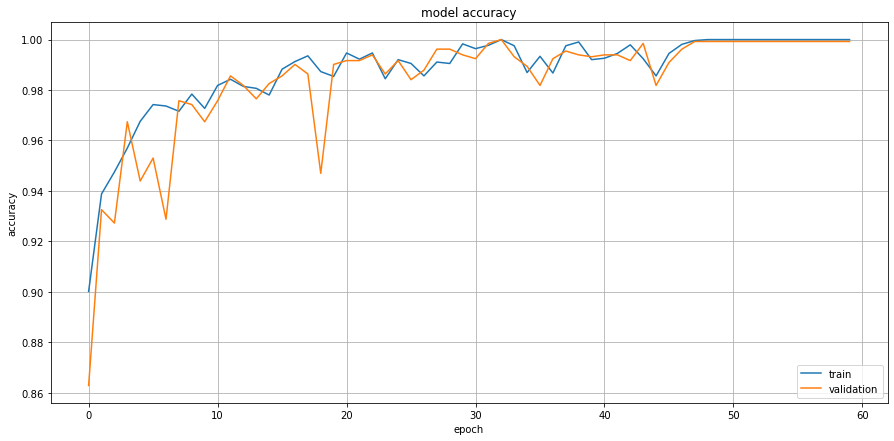

In [52]:
%matplotlib inline

# summarize history for accuracy
plt.figure(figsize=(15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

plt.show()


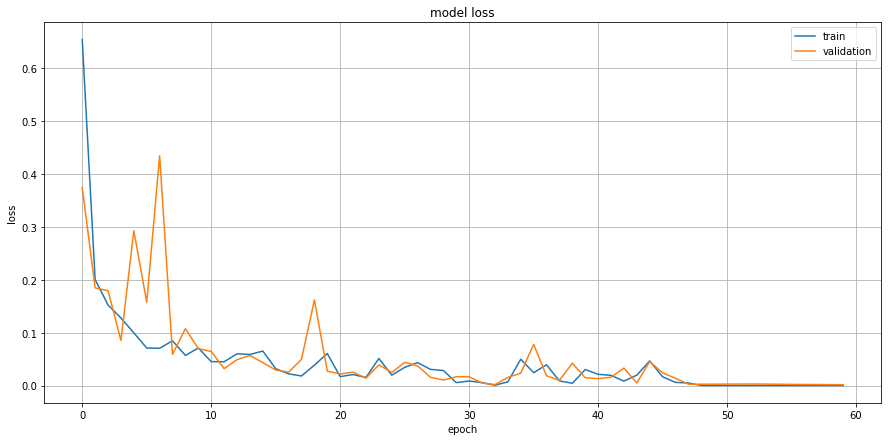

In [53]:
# summarize history for loss
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [42]:
# Saving Model in h5 format
filepath = 'model.h5'
model.save(filepath)

##################################### A Notebook by Ajay Chouhan ##########################################